# Jednorozmerná diskrétna náhodná premenná

Predpokladajme, že máme konečnú postupnosť $X$, ktorá obsahuje $m$ hodnôt náhodnej premennej, $X=\{X_1, X_2, \dots X_m\}$, Rozsah hodnôt náhodnej premennej $X$ je daný $n$ diskrétnymi hodnotami $x_i, \, i=1 \dots n$.

Pravdepodobnosť $p_i$  výskytu hodnoty $x_i$ v postupnosti $X$ je definovaná ako počet výskytov tejto hodnoty $q_i$ vzhľadom na celkový počet hodnôt v súbore $m$

\begin{equation}
p_i = P \,(x_i) = \frac{q_i}{m}  
\end{equation}



In [1]:
%reset -f  
%matplotlib inline

import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt

# Priklad - Vypocet pravdepodobnosti vyskytu P(xi)

m = 30                   # pocet hodnot X   
X = randint(6, size=m)   # vytvorenie pola X, int hodnoty z rozsahu 0...5, rovnomerne rozdelenie
xi = 3                   # zvolena hodnota nahodnej premennej
qi = sum(X==xi)          # vypocet pocetnosti vyskytu xi
P = qi / m               # vypocet pravdepodobnosti P

print('  X  = ', X)
print('  qi = ', qi)
print('P({0:1d}) =  {1:0.3f}'.format(xi,P))

  X  =  [2 4 2 3 4 3 0 5 4 1 0 4 2 3 2 5 0 0 2 5 5 0 0 1 1 3 5 1 1 2]
  qi =  4
P(3) =  0.133


Označenie $P(x_i)$  definuje pravdepodobnosť ako funkčnú závislosť od hodnoty $x_i$.V literatúre sa vyskytujú aj alternatívne označenie $P(X=x_i)$, $P[X=x_i]$.

Charakteristickou hodnotou náhodnej premennej je stredná hodnota $E[X]$ (v literatúre označovaná aj ako <i>mean</i>, <i>excepted value</i>) $E[X]$, štandardne označovaná aj ako $\mu$. Pre túto  môžeme písať 

\begin{equation}
\mu = E[X] = \frac{1}{m} \sum_{i=1}^n q_i x_i = \sum_{i=1}^n p_i x_i 
\end{equation}

kde postupnosť $ \lbrace p_1, \, p_2 \dots \rbrace $ definuje rozdelenie pravdepodobností pre hodnoty $ \lbrace x_1, \, x_2 \dots \rbrace $. 

Označenie $E[X]$ definuje operátor nad postupnosťou $X$, t.j. násobenie a následnú sumáciu prvkov postupnosti, napr.

\begin{equation}
E[Y + a] = \frac{1}{m} \sum_{i=1}^n q_i (y_i + a) = \sum_{i=1}^n p_i (y_i + a) 
\end{equation}

V literatúre sa používajú pre označenie strednej hodnoty aj symboly $\mathbb{E}[X]$, $E(X)$, $E(x)$, $\overline{X}$, $\overline{x}$.

In [2]:
# Priklad - Vypocet strednej hodnoty

x = range(6)             # hodnoty xi [0, 1, ... 5]
q = np.zeros(6)          # hodnoty qi [0, 0,     0]
p = np.zeros(6)          # hodnoty pi [0, 0,     0]

for xi in x:
    q[xi] = sum(X==xi)
    p[xi] = q[xi] / m
    print('xi = {0:1d}    qi ={1:2.0f}    pi = {2:1.3f}'.format(xi,q[xi], p[xi]))

mean = sum(p*x)
print()
print('      Mean = ', mean)
print('Numpy mean = ', np.mean(X))    # standard numpy function mean(x)

xi = 0    qi = 6    pi = 0.200
xi = 1    qi = 5    pi = 0.167
xi = 2    qi = 6    pi = 0.200
xi = 3    qi = 4    pi = 0.133
xi = 4    qi = 4    pi = 0.133
xi = 5    qi = 5    pi = 0.167

      Mean =  2.33333333333
Numpy mean =  2.33333333333


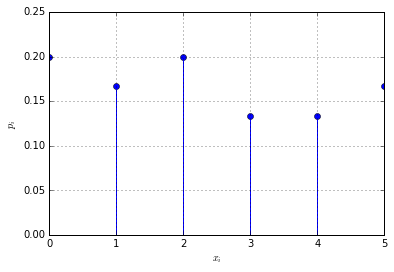

In [3]:
# Priklad - Zobrazenie zavislosti pi od xi - diskrétna rozdelovacia funkcia nahodnej premennej

plt.stem(x,p)
plt.grid()
plt.xlabel(r'$x_i$')
plt.ylabel(r'$p_i$')
plt.show()

Je zrejmé, že pre súčet hodnôt rozdelenia pravdepodobností platí

\begin{equation}
\sum_{i=1}^n p_i = 1
\end{equation}

In [4]:
print(sum(p))

1.0


Vlastnosti odchýlok náhodnej premennej $X$ od strednej hodnoty $\mu$ popisuje rozptyl (<i>variance</i>) $Var[X]$, v technickej praxi označovaný aj ako $\sigma^2$, ktorý je definovaný vzťahom

\begin{equation}
\nonumber
\sigma^2 = Var[X] =  E[(X-E[X])^2] = E[(X-\mu)^2] 
\end{equation}

Pri diskrétnom rozdelení vzťah pre rozptyl má tvar (s uplatnením vlastností operátora $E[X]$ ) 

\begin{equation}
Var[X] =  E[(X-\mu)^2] = \frac{1}{m} \sum_{i=1}^n q_i (x_i - \mu)^2 = \sum_{i=1}^n p_i (x_i - \mu)^2
\end{equation} 

Štandardná odchýlka (<i>standard deviation</i>) $\sigma$ je definovaná ako

\begin{equation}
\sigma = \sqrt{Var[X]} 
\end{equation}

In [5]:
# Priklad - Vypocet variancie a standardnej odchylky

variance = sum(p*(x - mean)**2)

print('      Variance =', variance)
print('Numpy Variance =', np.var(X))    # standard numpy function var(x)

std_dev = np.sqrt(variance)

print()
print('  Standard dev.=', std_dev)
print('Numpy std. dev.=', np.std(X))    # standard numpy function std(x)

      Variance = 3.02222222222
Numpy Variance = 3.02222222222

  Standard dev.= 1.73845397472
Numpy std. dev.= 1.73845397472


Na základe vlastností operátora $E[X]$ môžeme odvodiť nasledujúce vzťahy

\begin{equation}
E[c \, X] = c \, E[X]     
\end{equation}

\begin{equation}
E[X + c]  = E[X] + c       
\end{equation}

\begin{equation}
E[X + Y] = E[X] + E[Y]     
\end{equation}

\begin{equation}
E[a X + b] = a \, E[X] + b 
\end{equation}

\begin{equation}
E[(X-\mu)^2] =  E[X^2 - 2 X \mu + \mu^2]= E[X^2] - 2 \, E[X] \, \mu + \mu^2] = E[X^2] - 2 \mu^2 + \mu^2 =  E[X^2] - \mu^2 
\end{equation}

\begin{equation}
Var[\,c\,] = 0 \qquad (\overline{c} = c, \: c - \overline{c} = 0)
\end{equation}

\begin{equation}
Var[\,a \, X + c\,] = a^2 \, Var[X] 
\end{equation}


<b> Príklad - Hádzanie kocky </b>

Pri hádzaní kocky môžu padnúť hodnoty $x= \{1,2,3,4,5,6\}$. Pri dostatočne veľkom počte pokusov,  zistíme, že pravdepodobnosť pre každú hodnotu $x_i$ je rovnaká a rovná  $p_i = 1/6 = 0.1666$.

Pre strednú hodnotu $E[X]$ platí

\begin{equation*}
E[X] = \frac{1 + 2 +3 +4 +5 +6 }{6} = 3.5 
\end{equation*}

Pre rozptyl $Var[X]$ platí

\begin{equation*}
Var[X] = \frac{(-2.5)^2 + (-1.5)^2 + (-0.5)^2 + 0.5^2 + 1.5^2 + 2.5^2 }{6} = 2.91 
\end{equation*}



<i>Poznámka</i> 

Chuck Norris údajne dokázal pri nekonečnom počte hodov kockou hodiť samé šestky, sem tam aj sedmičku, pre takýto prípad platí rozdelenie pravdepodobnosti $p_{1 \dots 5}=0$ , $p_6=1$ , $p_7 \neq 0$, $m \rightarrow \infty$

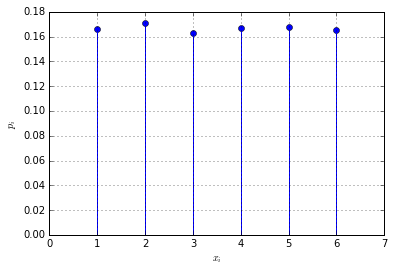

    Mean = 3.4939
Variance = 2.91816279
Std. dev.= 1.70826309156


In [6]:
# Simulacia hodu kockou
m = 10000                    # pocet hodov kocky   
p = []
x = range(1,7)               # pole hodnot xi = 1...6
X = randint(1, 7, size=m)    # nahodna premenna X, rovnomerne rozdelenie
for xi in x:
    p.append(sum(X==xi)/m)

plt.stem(x,p)
plt.grid()
plt.xlim(0,7)
plt.xlabel(r'$x_i$')
plt.ylabel(r'$p_i$')
plt.show()

print('    Mean =', np.mean(X))
print('Variance =', np.var(X))
print('Std. dev.=', np.std(X))

### Literatúra

Dokumentácia k štatistickým funkciám Numpy

https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.statistics.html